In [59]:
import csv
import pandas as pd
import mysql.connector
import numpy as np
import fonction as f
import seaborn as sns

data = pd.read_sql

sql_conn =  mysql.connector.connect(host='213.190.6.22', database='u485051925_tecog', user='u485051925_cogueur',  password='Josiana34')
#sql_conn =  mysql.connector.connect(host='localhost', database='te_cog', user='root',  password='')
query = "SELECT * FROM digit"
data = pd.read_sql(query, sql_conn)

df = data.set_index(['id_sujet', 'trial', 'item'])
df.to_csv('data.csv')
df

correct key_press correct_response       rt  \
id_sujet trial item                                                
30       1     1           1         2                2  425.170   
               2           1         9                9  135.260   
               3           1         5                5  173.410   
         2     1           1         4                4  648.540   
               2           1         1                1  728.415   
...                      ...       ...              ...      ...   
38       14    4           0         4                9    7.220   
               5           0         5                1  623.965   
               6           0         6                8    0.085   
               7           0         8                2  582.905   
               8           0         7                4    0.090   

                     time_elapsed   test_part  
id_sujet trial item                            
30       1     1           124134   trial_1_1  
               2           124270   trial_1_2  
               3           124444   trial_1_3  
         2     1           130598   trial_2_1  
               2           131327   trial_2_2  
...                           ...         ...  
38       14    4           288122  trial_14_4  
               5           288746  trial_14_5  
               6           288747  trial_14_6  
               7           289330  trial_14_7  
               8           289331  trial_14_8  

[846 rows x 6 columns]

In [61]:
query = "SELECT * FROM sujets"
sujets = pd.read_sql(query, sql_conn)
sujets

,id_sujet,code_sujet
0,30,test
1,31,test
2,32,test
3,33,test
4,34,test
5,35,test
6,36,test
7,37,test
8,38,test


In [63]:
scores = []
index = []
for i in sujets['id_sujet']:
    scores.append(f.scoring(df.xs(i)))
    index.append(i)

result = pd.DataFrame(scores, index=index)
result = result.transpose()
result.sum()

30    3
31    3
32    3
33    2
34    8
35    0
36    0
37    0
38    0
dtype: int64

In [65]:
rt = df.groupby(level=1).mean()
rt

,correct,rt,time_elapsed
trial,,,
1,0.592593,383.476852,56749.592593
2,0.555556,500.007361,65392.416667
3,0.488889,1069.410667,77269.111111
4,0.333333,456.467870,90948.462963
5,0.269841,416.550317,104499.142857
6,0.190476,385.314127,117994.000000
7,0.148148,873.205741,133554.777778
8,0.158730,636.939206,149487.444444
9,0.158730,493.953492,163520.571429


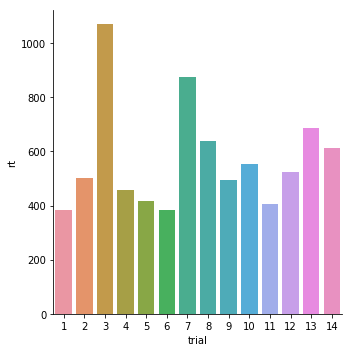

In [67]:
sns.catplot(x="trial", y="rt", kind="bar", data=rt.reset_index())

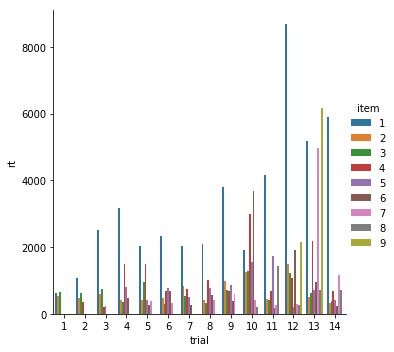

In [70]:
sns.catplot(x="trial", y="rt", hue="item", kind="bar", data=df.xs(34).reset_index())